Name :  Somya Dhar 

ID : 18-36396-1

Section : A 

In [1]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau

import os
import numpy as np
import matplotlib.pyplot as plt

os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [2]:
!nvidia-smi

Sun Jul 18 11:23:56 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
SEED = 1000
BATCH_SIZE = 256
IMG_SIZE=32;

X_train = np.array(X_train)
X_test = np.array(X_test)

X_train = X_train/ 255
X_test = X_test/ 255

In [6]:
train_gen_low_agmentation = ImageDataGenerator(
    # set range for random shear
    shear_range=0.2,
    # set range for random zoom
    zoom_range=0.3,
    horizontal_flip=True,
    # randomly flip images
    vertical_flip=False,
    validation_split=0.1,
    dtype=tf.float32
    )
    
train_gen_high_agmentation = ImageDataGenerator(
    # set input mean to 0 over the dataset
    featurewise_center=False,
    # set each sample mean to 0
    samplewise_center=False,
    # divide inputs by std of dataset
    featurewise_std_normalization=False,
    # divide each input by its std
    samplewise_std_normalization=False,
    # apply ZCA whitening
    zca_whitening=False,
    # epsilon for ZCA whitening
    zca_epsilon=1e-06,
    # randomly rotate images in the range (deg 0 to 180)
    rotation_range=60,
    # randomly shift images horizontally
    width_shift_range=0.2,
    # randomly shift images vertically
    height_shift_range=0.2,
    # set range for random shear
    shear_range=0.2,
    # set range for random zoom
    zoom_range=0.3,
    # set range for random channel shifts
    channel_shift_range=0.,
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    # value used for fill_mode = "constant"
    cval=0.,
    # randomly flip images
    horizontal_flip=True,
    # randomly flip images
    vertical_flip=False,
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
    # image data format, either "channels_first" or "channels_last"
    data_format=None,
    # fraction of images reserved for validation 
    
    validation_split=0.1,
    dtype=tf.float32,
)


In [7]:
t_batch_low_agmentation = train_gen_low_agmentation.flow(X_train,Y_train,batch_size = BATCH_SIZE)


t_batch_high_agmentation = train_gen_high_agmentation.flow(X_train,Y_train,batch_size = BATCH_SIZE)

In [8]:
# VGG -16 CNN Architecture

model = keras.Sequential([
    keras.Input(shape=X_train.shape[1:]),
    
    layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"),
    layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    layers.Flatten(),
    layers.Dense(4096,activation="relu"),
    layers.Dense(4096,activation="relu"),
    layers.Dense(10, activation="softmax")
    ])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)         2

In [9]:
model=model
model_Low=model
model_high=model

In [10]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [11]:
model_Low.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [12]:
model_high.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

**without agmentation**

In [13]:
h = model.fit(x=X_train, y=Y_train, epochs=10,validation_split=0.1, batch_size=256,shuffle = True)

Epoch 1/10
176/176 [==============================] - 29s 127ms/step - loss: 1.9737 - accuracy: 0.2203 - val_loss: 1.7417 - val_accuracy: 0.3104
Epoch 2/10
176/176 [==============================] - 18s 104ms/step - loss: 1.6219 - accuracy: 0.3668 - val_loss: 1.4903 - val_accuracy: 0.4214
Epoch 3/10
176/176 [==============================] - 18s 103ms/step - loss: 1.4200 - accuracy: 0.4632 - val_loss: 1.3555 - val_accuracy: 0.5058
Epoch 4/10
176/176 [==============================] - 18s 101ms/step - loss: 1.2511 - accuracy: 0.5407 - val_loss: 1.1896 - val_accuracy: 0.5744
Epoch 5/10
176/176 [==============================] - 18s 102ms/step - loss: 1.0940 - accuracy: 0.6020 - val_loss: 1.0644 - val_accuracy: 0.6190
Epoch 6/10
176/176 [==============================] - 18s 103ms/step - loss: 0.9514 - accuracy: 0.6583 - val_loss: 1.0666 - val_accuracy: 0.6314
Epoch 7/10
176/176 [==============================] - 18s 103ms/step - loss: 0.8505 - accuracy: 0.6957 - val_loss: 0.9779 - val_ac

In [14]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 4s 10ms/step - loss: 0.9039 - accuracy: 0.7005

Test accuracy: 0.7005000114440918


**With low agmentation**

In [15]:
h_low_agmentation = model_Low.fit(t_batch_low_agmentation, 
              epochs=10,
              steps_per_epoch = X_train.shape[0] // BATCH_SIZE,
              #validation_split=0.1,
              #callbacks=lr_scheduler,
              verbose=1
             )

Epoch 1/10
195/195 [==============================] - 28s 140ms/step - loss: 0.9145 - accuracy: 0.6828
Epoch 2/10
195/195 [==============================] - 26s 131ms/step - loss: 0.8419 - accuracy: 0.7066
Epoch 3/10
195/195 [==============================] - 26s 134ms/step - loss: 0.7857 - accuracy: 0.7263
Epoch 4/10
195/195 [==============================] - 26s 132ms/step - loss: 0.7456 - accuracy: 0.7416
Epoch 5/10
195/195 [==============================] - 25s 129ms/step - loss: 0.7024 - accuracy: 0.7560
Epoch 6/10
195/195 [==============================] - 26s 135ms/step - loss: 0.6834 - accuracy: 0.7637
Epoch 7/10
195/195 [==============================] - 26s 130ms/step - loss: 0.6431 - accuracy: 0.7772
Epoch 8/10
195/195 [==============================] - 26s 133ms/step - loss: 0.6329 - accuracy: 0.7813
Epoch 9/10
195/195 [==============================] - 25s 130ms/step - loss: 0.5976 - accuracy: 0.7945
Epoch 10/10
195/195 [==============================] - 26s 134ms/step - l

In [16]:
test_loss, test_acc = model_Low.evaluate(X_test, Y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 3s 9ms/step - loss: 0.6724 - accuracy: 0.7695

Test accuracy: 0.7695000171661377


**With High augmentation**

In [17]:
h_high_agmentation = model_high.fit(t_batch_high_agmentation, 
              epochs=10,
              steps_per_epoch = X_train.shape[0] // BATCH_SIZE,
              verbose=1
             )

Epoch 1/10
195/195 [==============================] - 31s 158ms/step - loss: 12.7041 - accuracy: 0.0984
Epoch 2/10
195/195 [==============================] - 30s 151ms/step - loss: 2.3027 - accuracy: 0.1003
Epoch 3/10
195/195 [==============================] - 31s 157ms/step - loss: 2.3027 - accuracy: 0.0998
Epoch 4/10
195/195 [==============================] - 30s 153ms/step - loss: 2.3027 - accuracy: 0.0976
Epoch 5/10
195/195 [==============================] - 30s 152ms/step - loss: 2.3027 - accuracy: 0.0988
Epoch 6/10
195/195 [==============================] - 31s 159ms/step - loss: 2.3027 - accuracy: 0.0982
Epoch 7/10
195/195 [==============================] - 30s 155ms/step - loss: 2.3027 - accuracy: 0.0962
Epoch 8/10
195/195 [==============================] - 31s 159ms/step - loss: 2.3027 - accuracy: 0.0985
Epoch 9/10
195/195 [==============================] - 30s 155ms/step - loss: 2.3026 - accuracy: 0.0986
Epoch 10/10
195/195 [==============================] - 31s 161ms/step - 

In [18]:
test_loss, test_acc = model_high.evaluate(X_test, Y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 3s 9ms/step - loss: 2.3103 - accuracy: 0.1000

Test accuracy: 0.10000000149011612


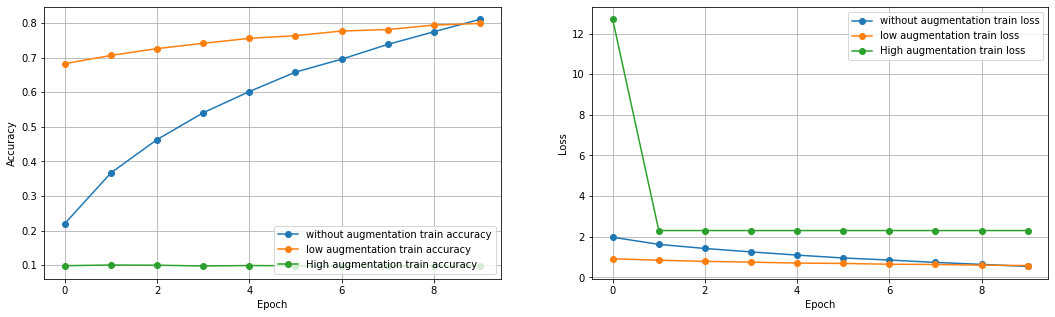

In [19]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='without augmentation train accuracy')
plt.plot(h_low_agmentation.history['accuracy'], 'o-', label='low augmentation train accuracy')
plt.plot(h_high_agmentation.history['accuracy'], 'o-', label='High augmentation train accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='without augmentation train loss')
plt.plot(h_low_agmentation.history['loss'], 'o-', label='low augmentation train loss')
plt.plot(h_high_agmentation.history['loss'], 'o-', label='High augmentation train loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

##**Findings**

### The notebook contains several observations regarding model training, accuracy, losses, and data preparation.  Without data augmentation, the training accuracy is evidently higher than other methods. The accuracy of less data augmentation is higher than that of high data augmentation.

If we measure test accuracy by considering data augmentation, less data augmentation has higher accuracy than other data.
Similarly, we can observe that training needs more memory without the data generator. Data generators used with flow methods require significantly less memory to train.

As a result, we can conclude that we must use the data generator for less memory consumption, and we must also do some augmentation to extend the data set.